In [1]:
from assignment_analytical import *
from assignment_util import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import factorial

mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["legend.fontsize"] = 11
mpl.rcParams["font.size"] = 11

PLOTDIR = "plots"

def plot_savepath(filename):
    return PLOTDIR + f"/{filename}"

In [3]:
μ = 1.0
ρ_values = np.linspace(0,1,101)[1:-1]
λ_values = ρ_values * μ
server_counts = np.array([1,2,4])
analytical_waiting_times = np.array([MM1_waiting_time(λ, μ) for λ in λ_values])
analytical_waiting_times_MMn = np.array([MMn_mean_waiting_time(λ, μ, 1) for λ in λ_values])

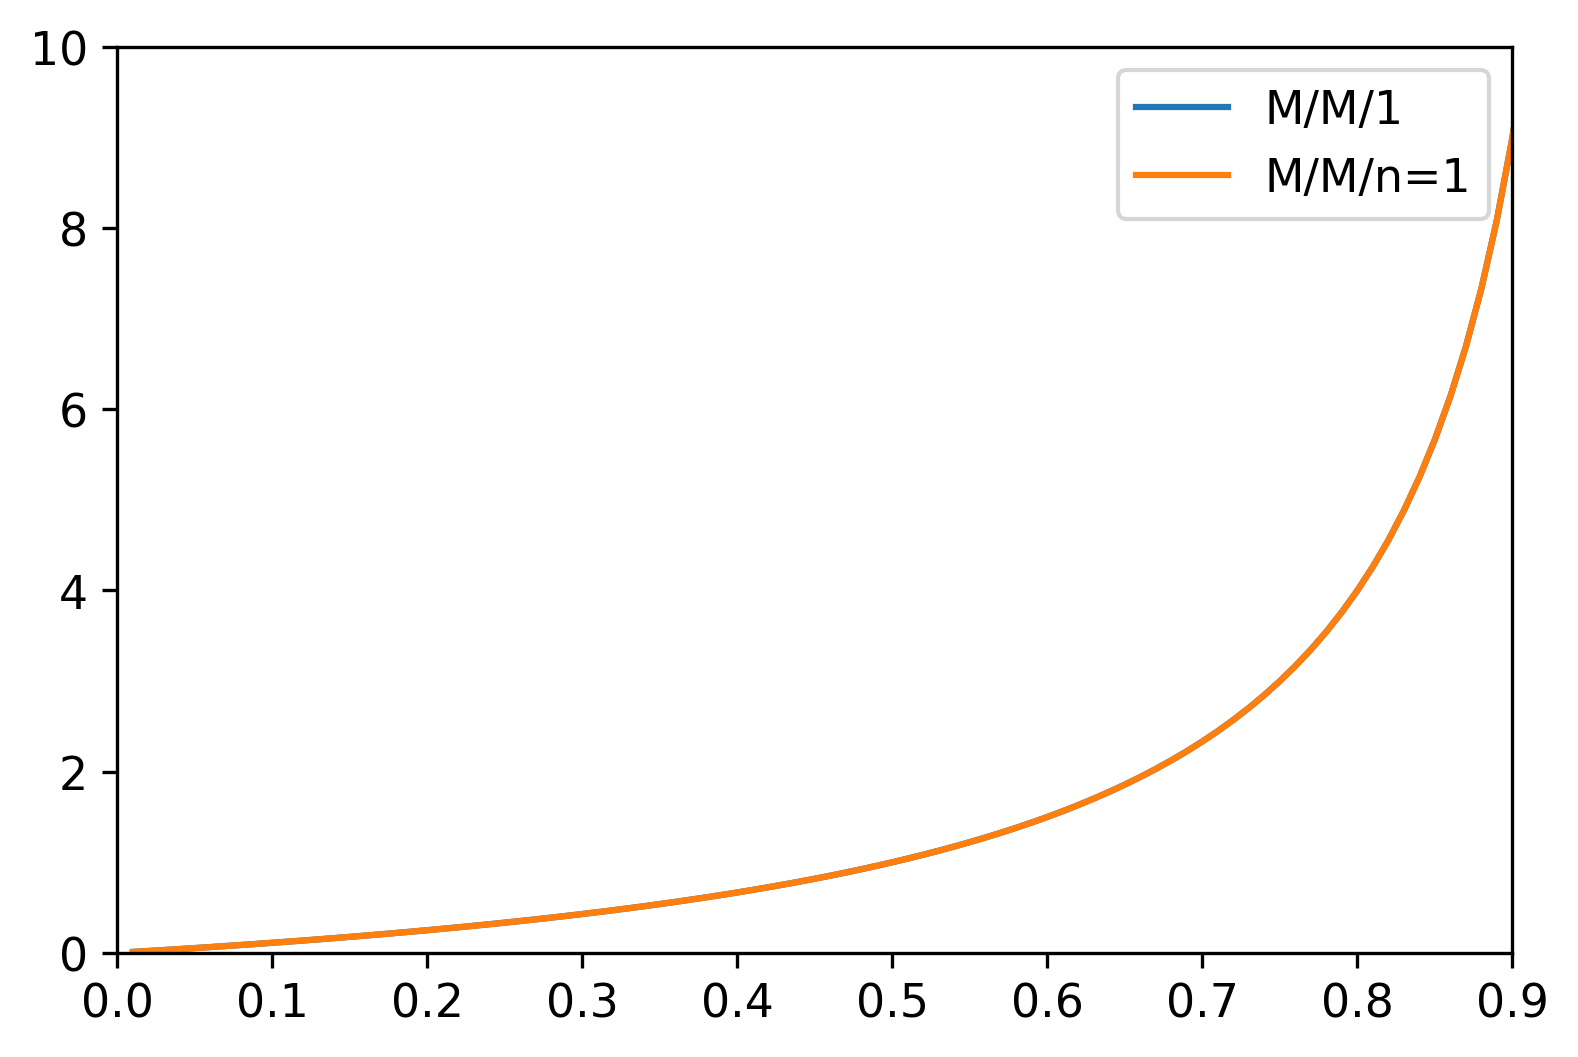

In [4]:
plt.plot(ρ_values, analytical_waiting_times, label = "M/M/1")
# MM1_waiting_time
plt.plot(ρ_values, analytical_waiting_times_MMn, label = "M/M/n=1")
# MMn_mean_waiting_time(λ, μ, n = 1)
plt.xlim(0, 0.9)
plt.ylim(0, 10)
plt.legend()
plt.show()

In [30]:
def MMn_analytical_plotter(title):
    
    server_counts = np.array([1,2,4])
    mean_waiting_times = [[MMn_mean_waiting_time(n*λ, μ, n) for λ in λ_values] for n in server_counts]

    fig = plt.figure(figsize = (5,4))
    ax = fig.add_subplot(1,1,1)
    colors = ["darkgreen", "red", "steelblue"]
    for i,wtimes in enumerate(mean_waiting_times):
        ax.plot(ρ_values, wtimes, label = f"M/M/{server_counts[i]}", c=colors[i])
    ax.set_xlabel("System load (ρ)")
    ax.set_ylabel("Mean waiting time (${T}_q$)")
    ax.grid(alpha = 0.6)
    ax.legend()
    ax.set_xlim(0, 0.9)
    ax.set_ylim(-5, 15)
    title = plot_savepath(title)
    plt.savefig(title, bbox_inches = 'tight')
    plt.show()

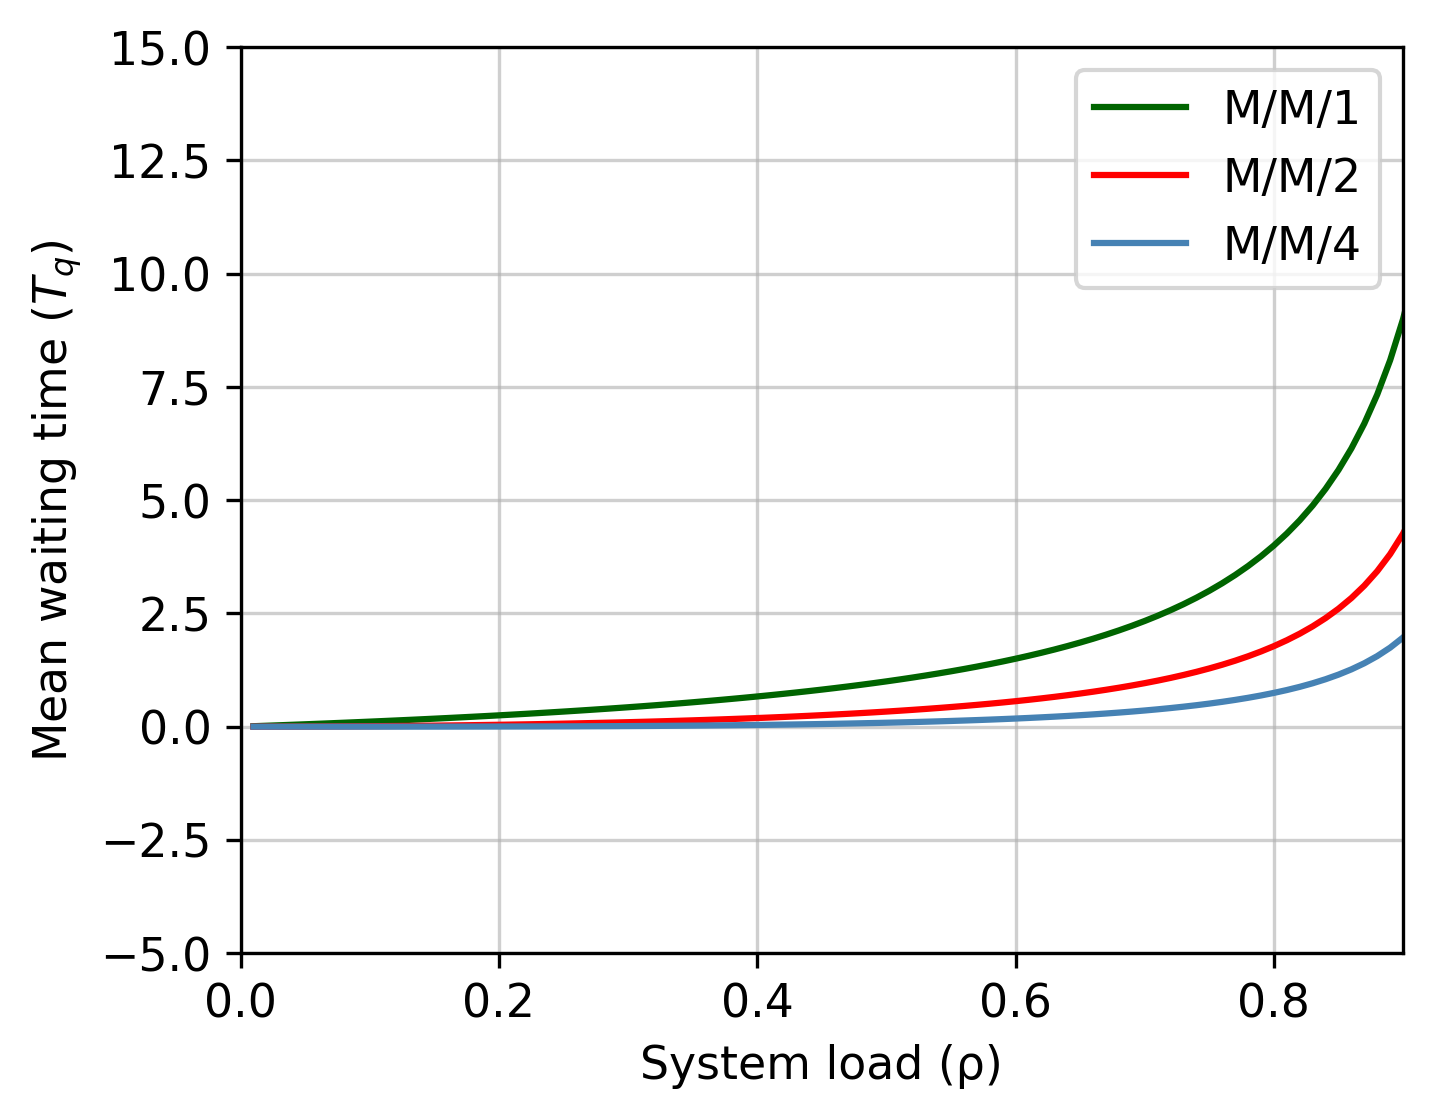

In [31]:
MMn_analytical_plotter("Analytical_wt.pdf")

In [69]:
ρ_values = np.linspace(0, 1, 1001)[1:-1]
_hexp_p1 = 0.75
ps_hexp = np.array([_hexp_p1, 1 - _hexp_p1])
μs_hexp = np.array([1., 1/5.])
μ_hexp_inv, σsq_hexp = hyperexp_mean_var(μs_hexp, ps_hexp)
μ = 1/μ_hexp_inv

# M/M/1 distro
λ_values = μ * ρ_values
σsq_M = np.power(1/μ, 2)
σsq_D = 0
σsq_H = σsq_hexp

σsq_values = [σsq_M, σsq_D, σsq_H]
service_time_labels = ["M", "D", "H"]
labels = [f"M/{X}/1" for X in service_time_labels]

mean_waiting_times = np.array([MG1_mean_waiting_time(λ_values, μ, np.sqrt(σsq)) for σsq in σsq_values])

In [70]:
def plot_comparison(mean_wtimes, ρ_values, labels, filename,  start = 0):
    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(1,1,1)
    for i,wtimes in enumerate(mean_wtimes):
        ax.plot(ρ_values[start:], wtimes[start:], label = labels[i])

    ax.set_xlabel("$ρ$")
    ax.set_ylabel("mean waiting time, $T_q$")
    ax.grid(alpha = 0.6)
    ax.legend()
    filepath = plot_savepath(filename)
    plt.savefig(filepath, bbox_inches = 'tight')
    plt.show()

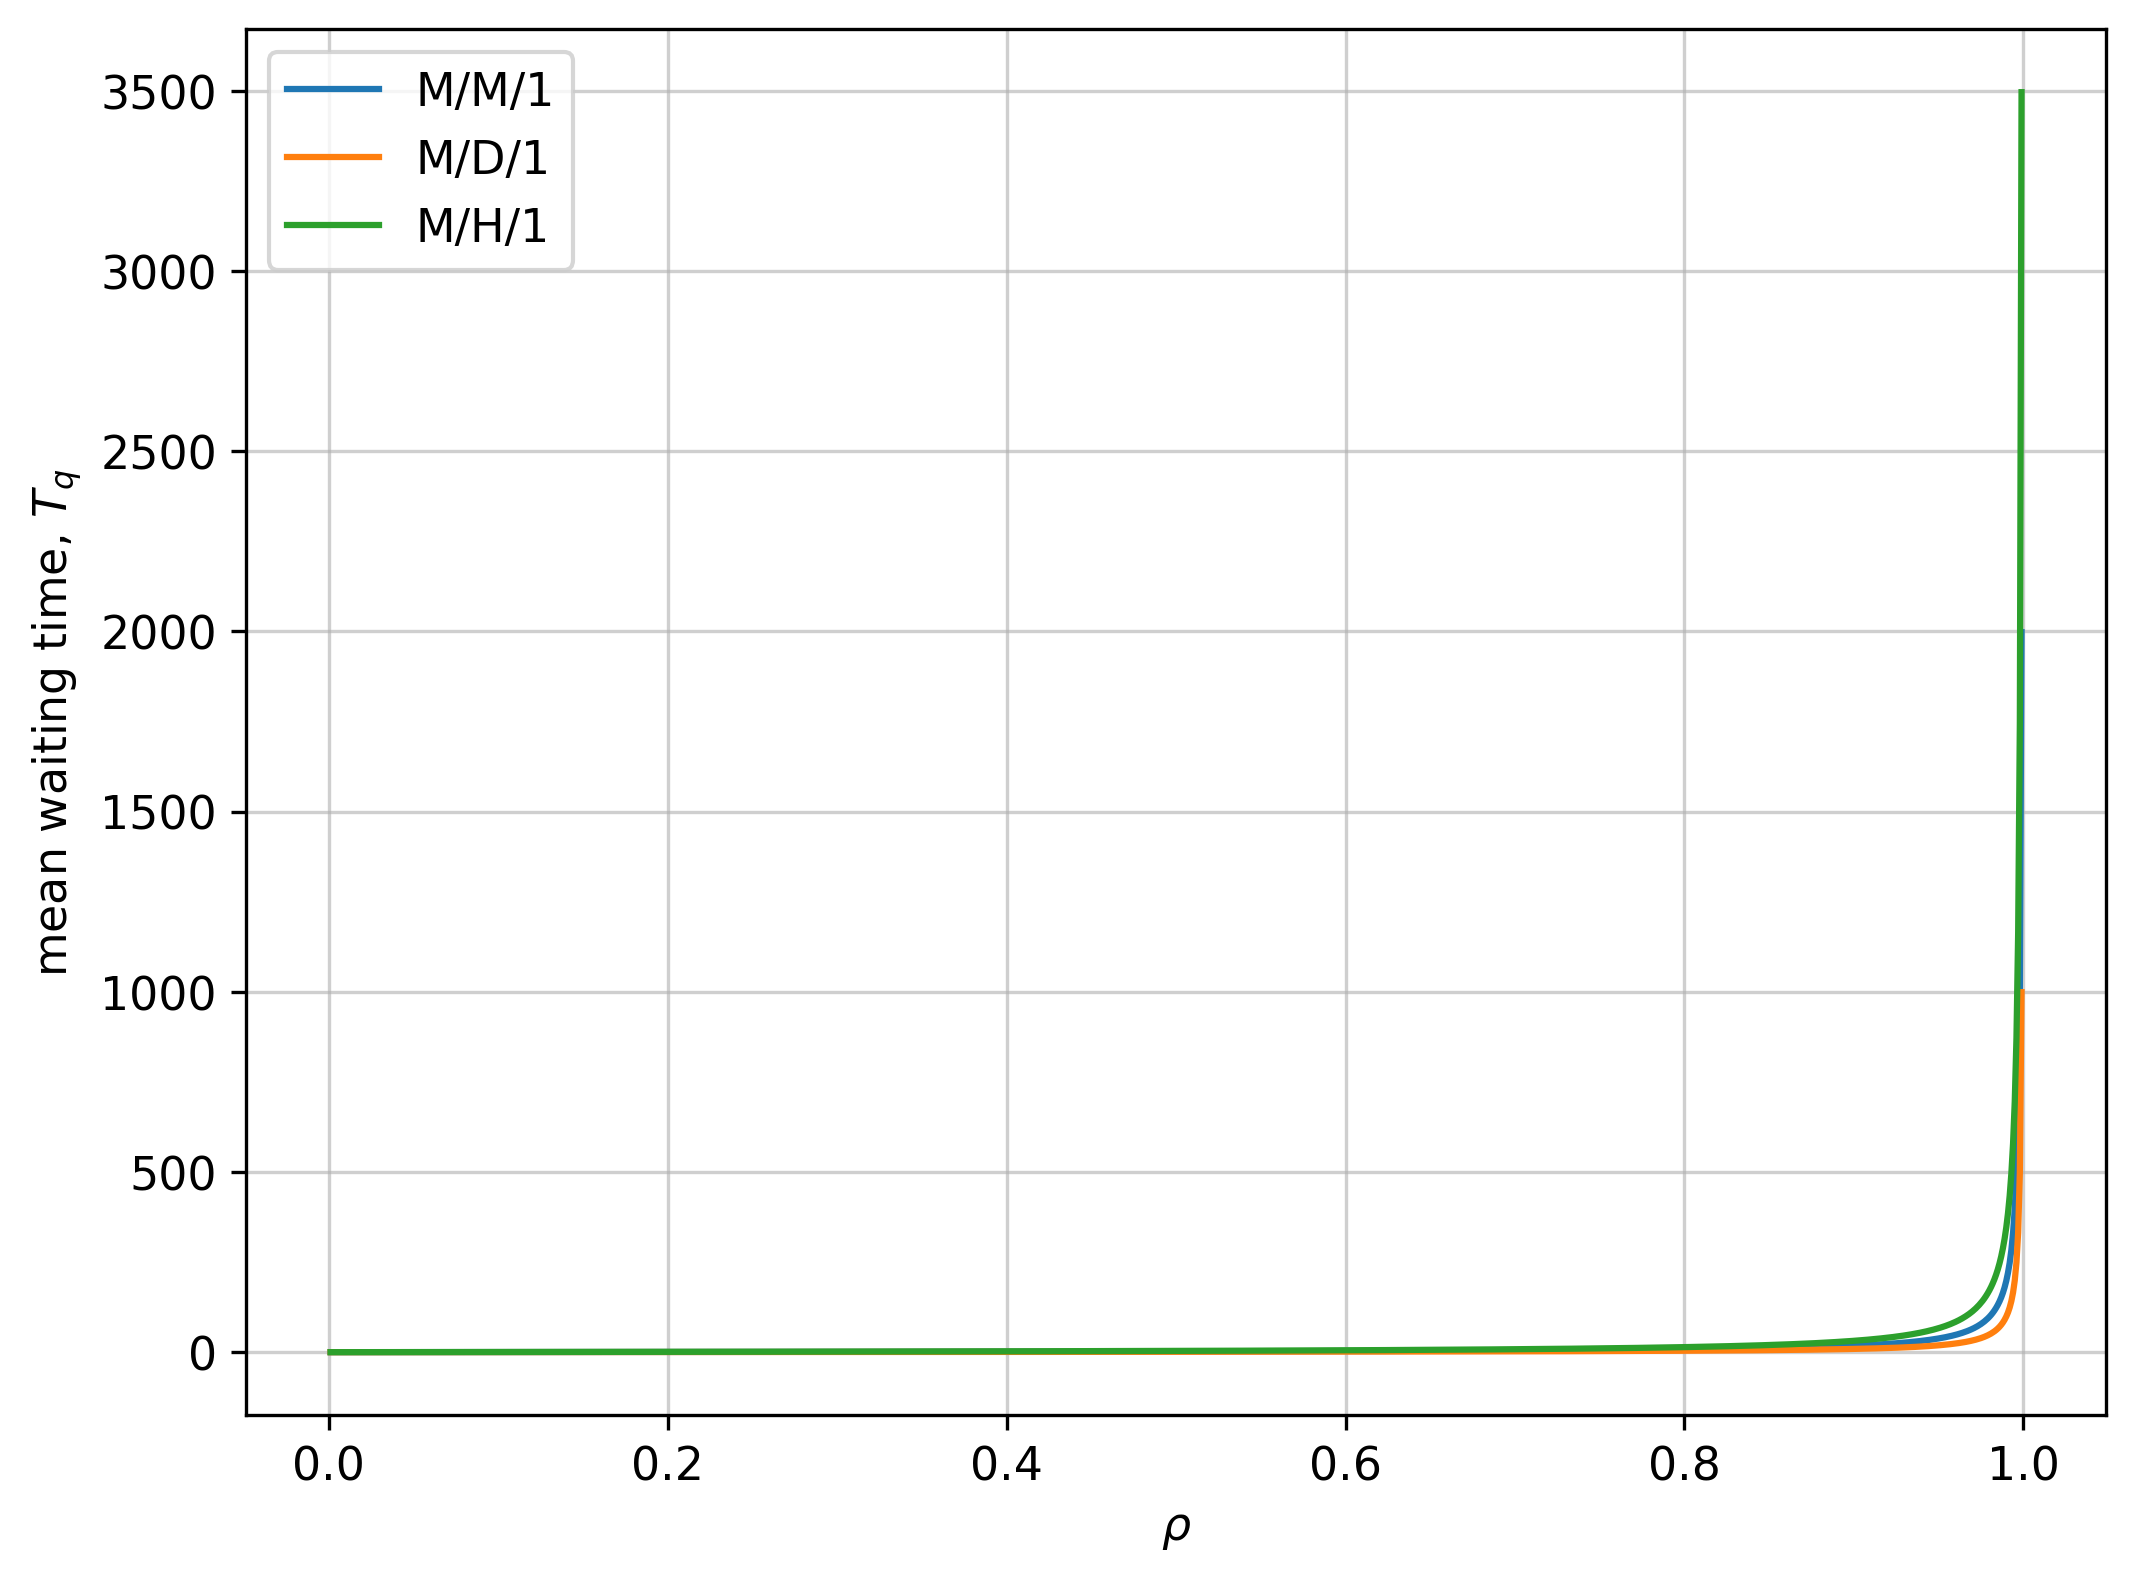

In [71]:
plot_comparison(mean_waiting_times, ρ_values, labels, "MG1_comparisons_01.pdf")

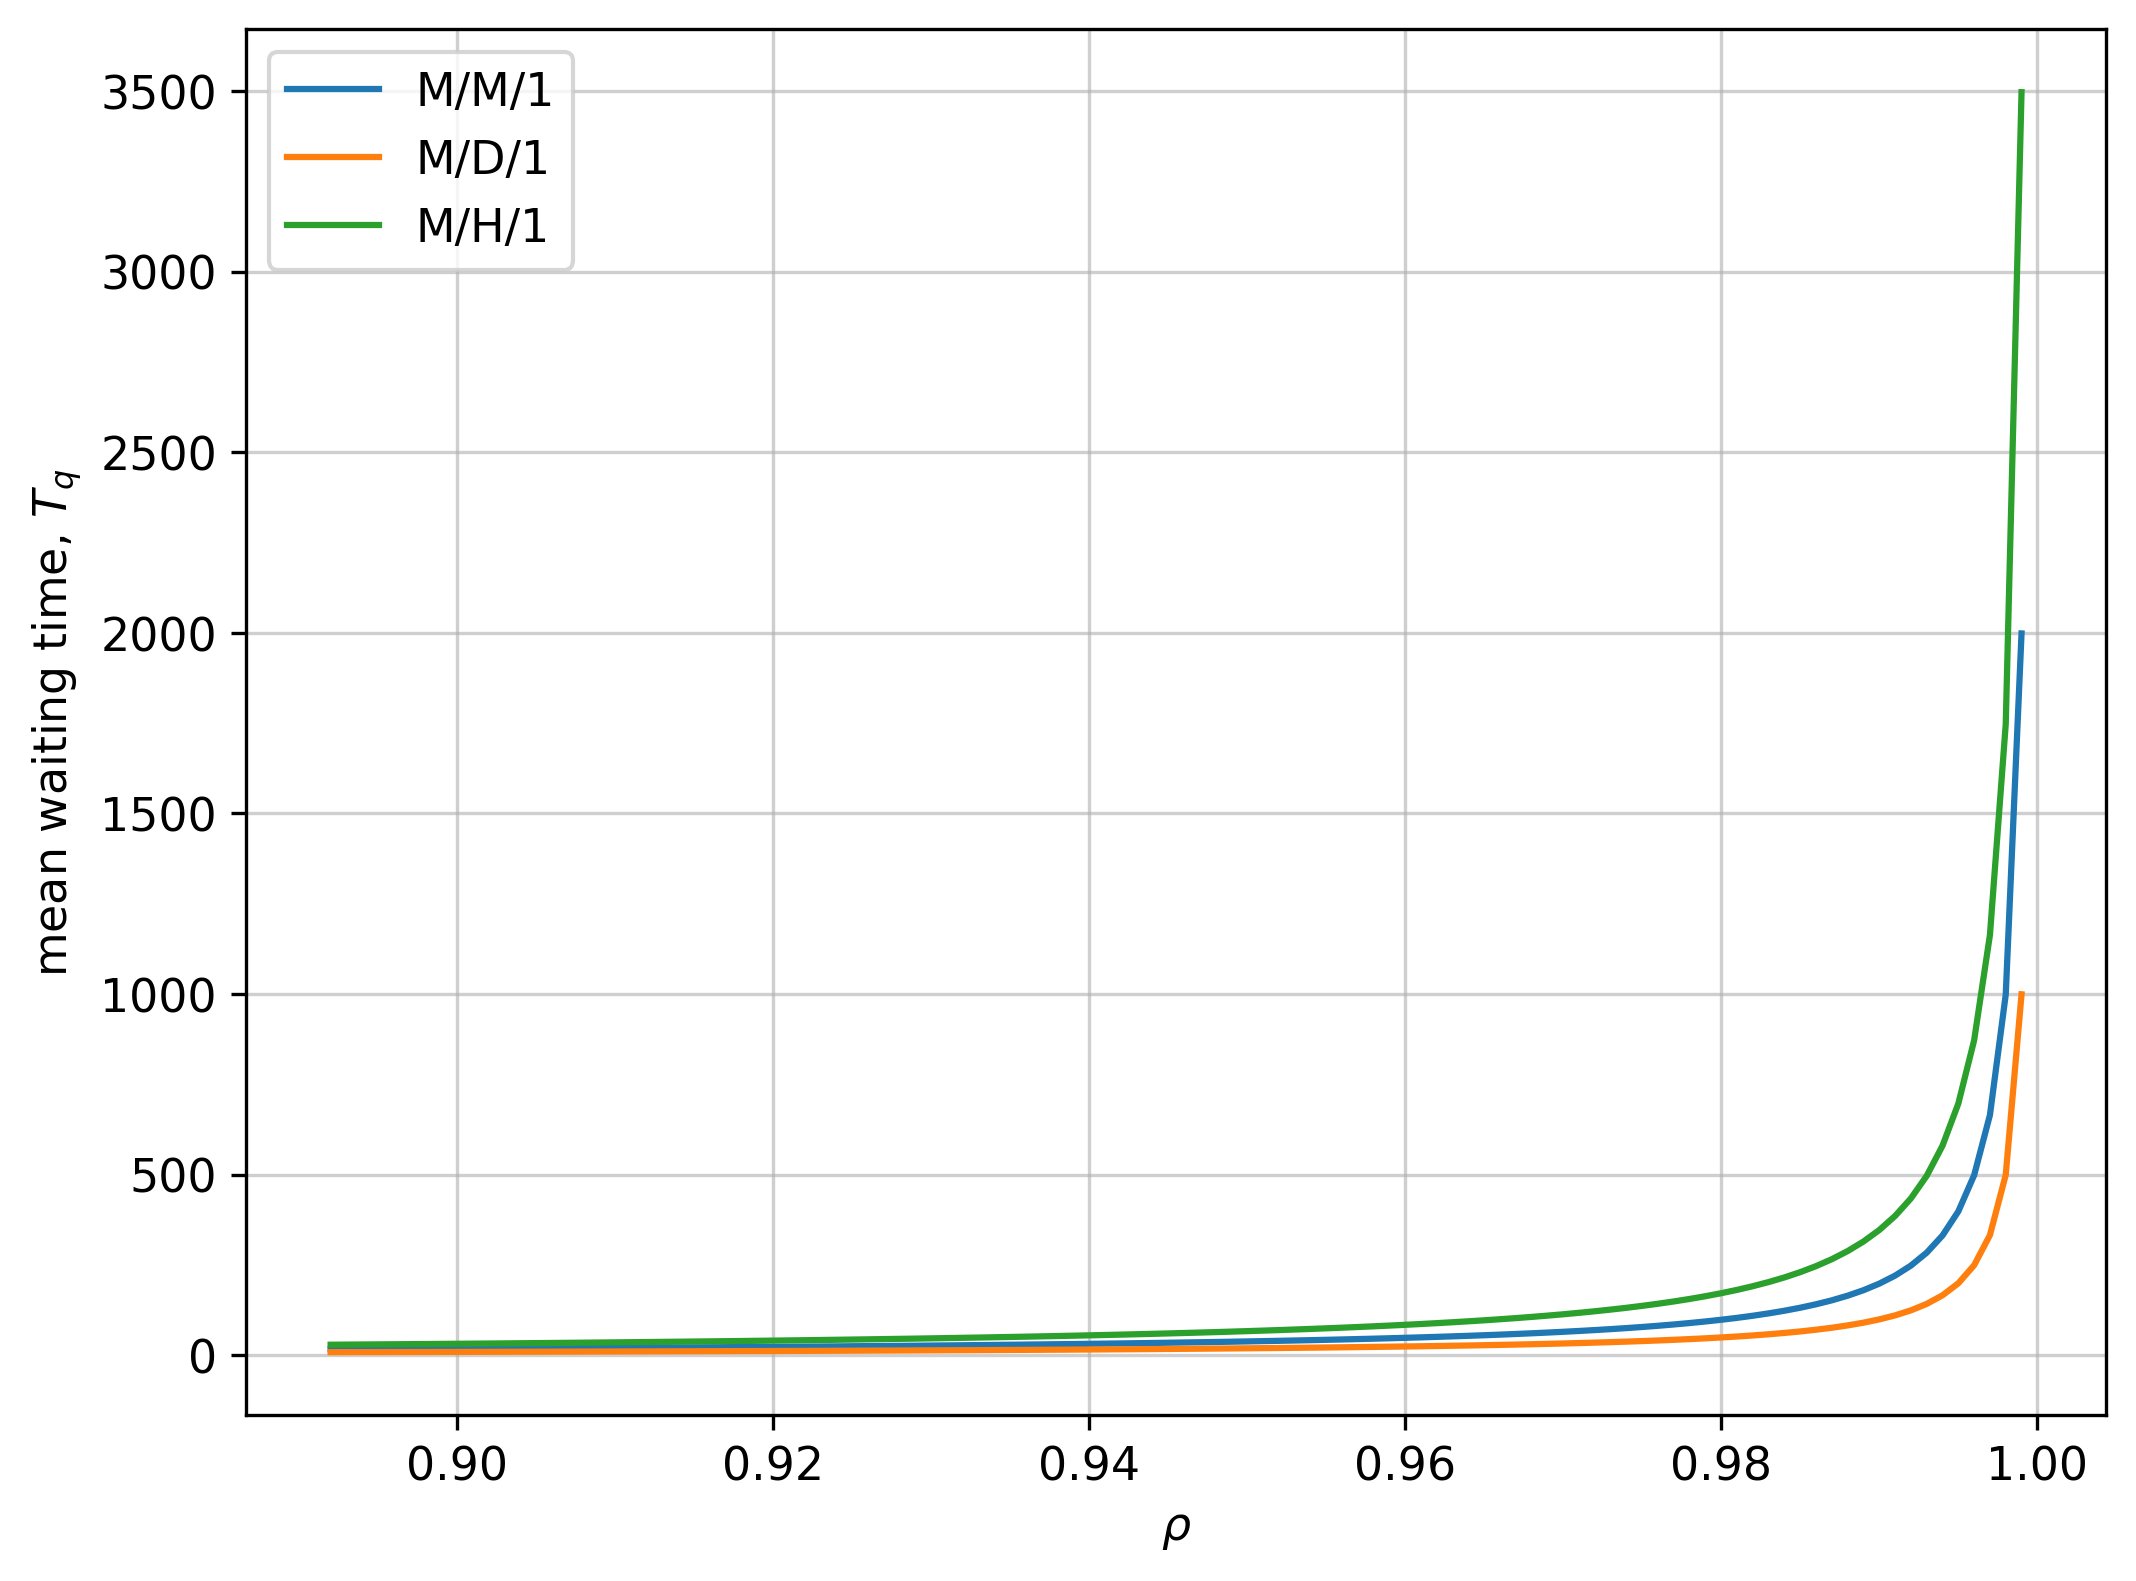

In [72]:
plot_comparison(mean_waiting_times, ρ_values, labels, "MG1_comparisons_09_1.pdf", start = 9 * (len(ρ_values)//10))

In [73]:
# ≈ 15 second runtime cell
MM1_fifo_waiting_times = [MM1_waiting_time(λ, μ) for λ in λ_values]
MM1_sptf_waiting_times = [MM1_sptf_waiting_time(ρ) for ρ in ρ_values]
waiting_times = np.array([MM1_fifo_waiting_times, MM1_sptf_waiting_times])

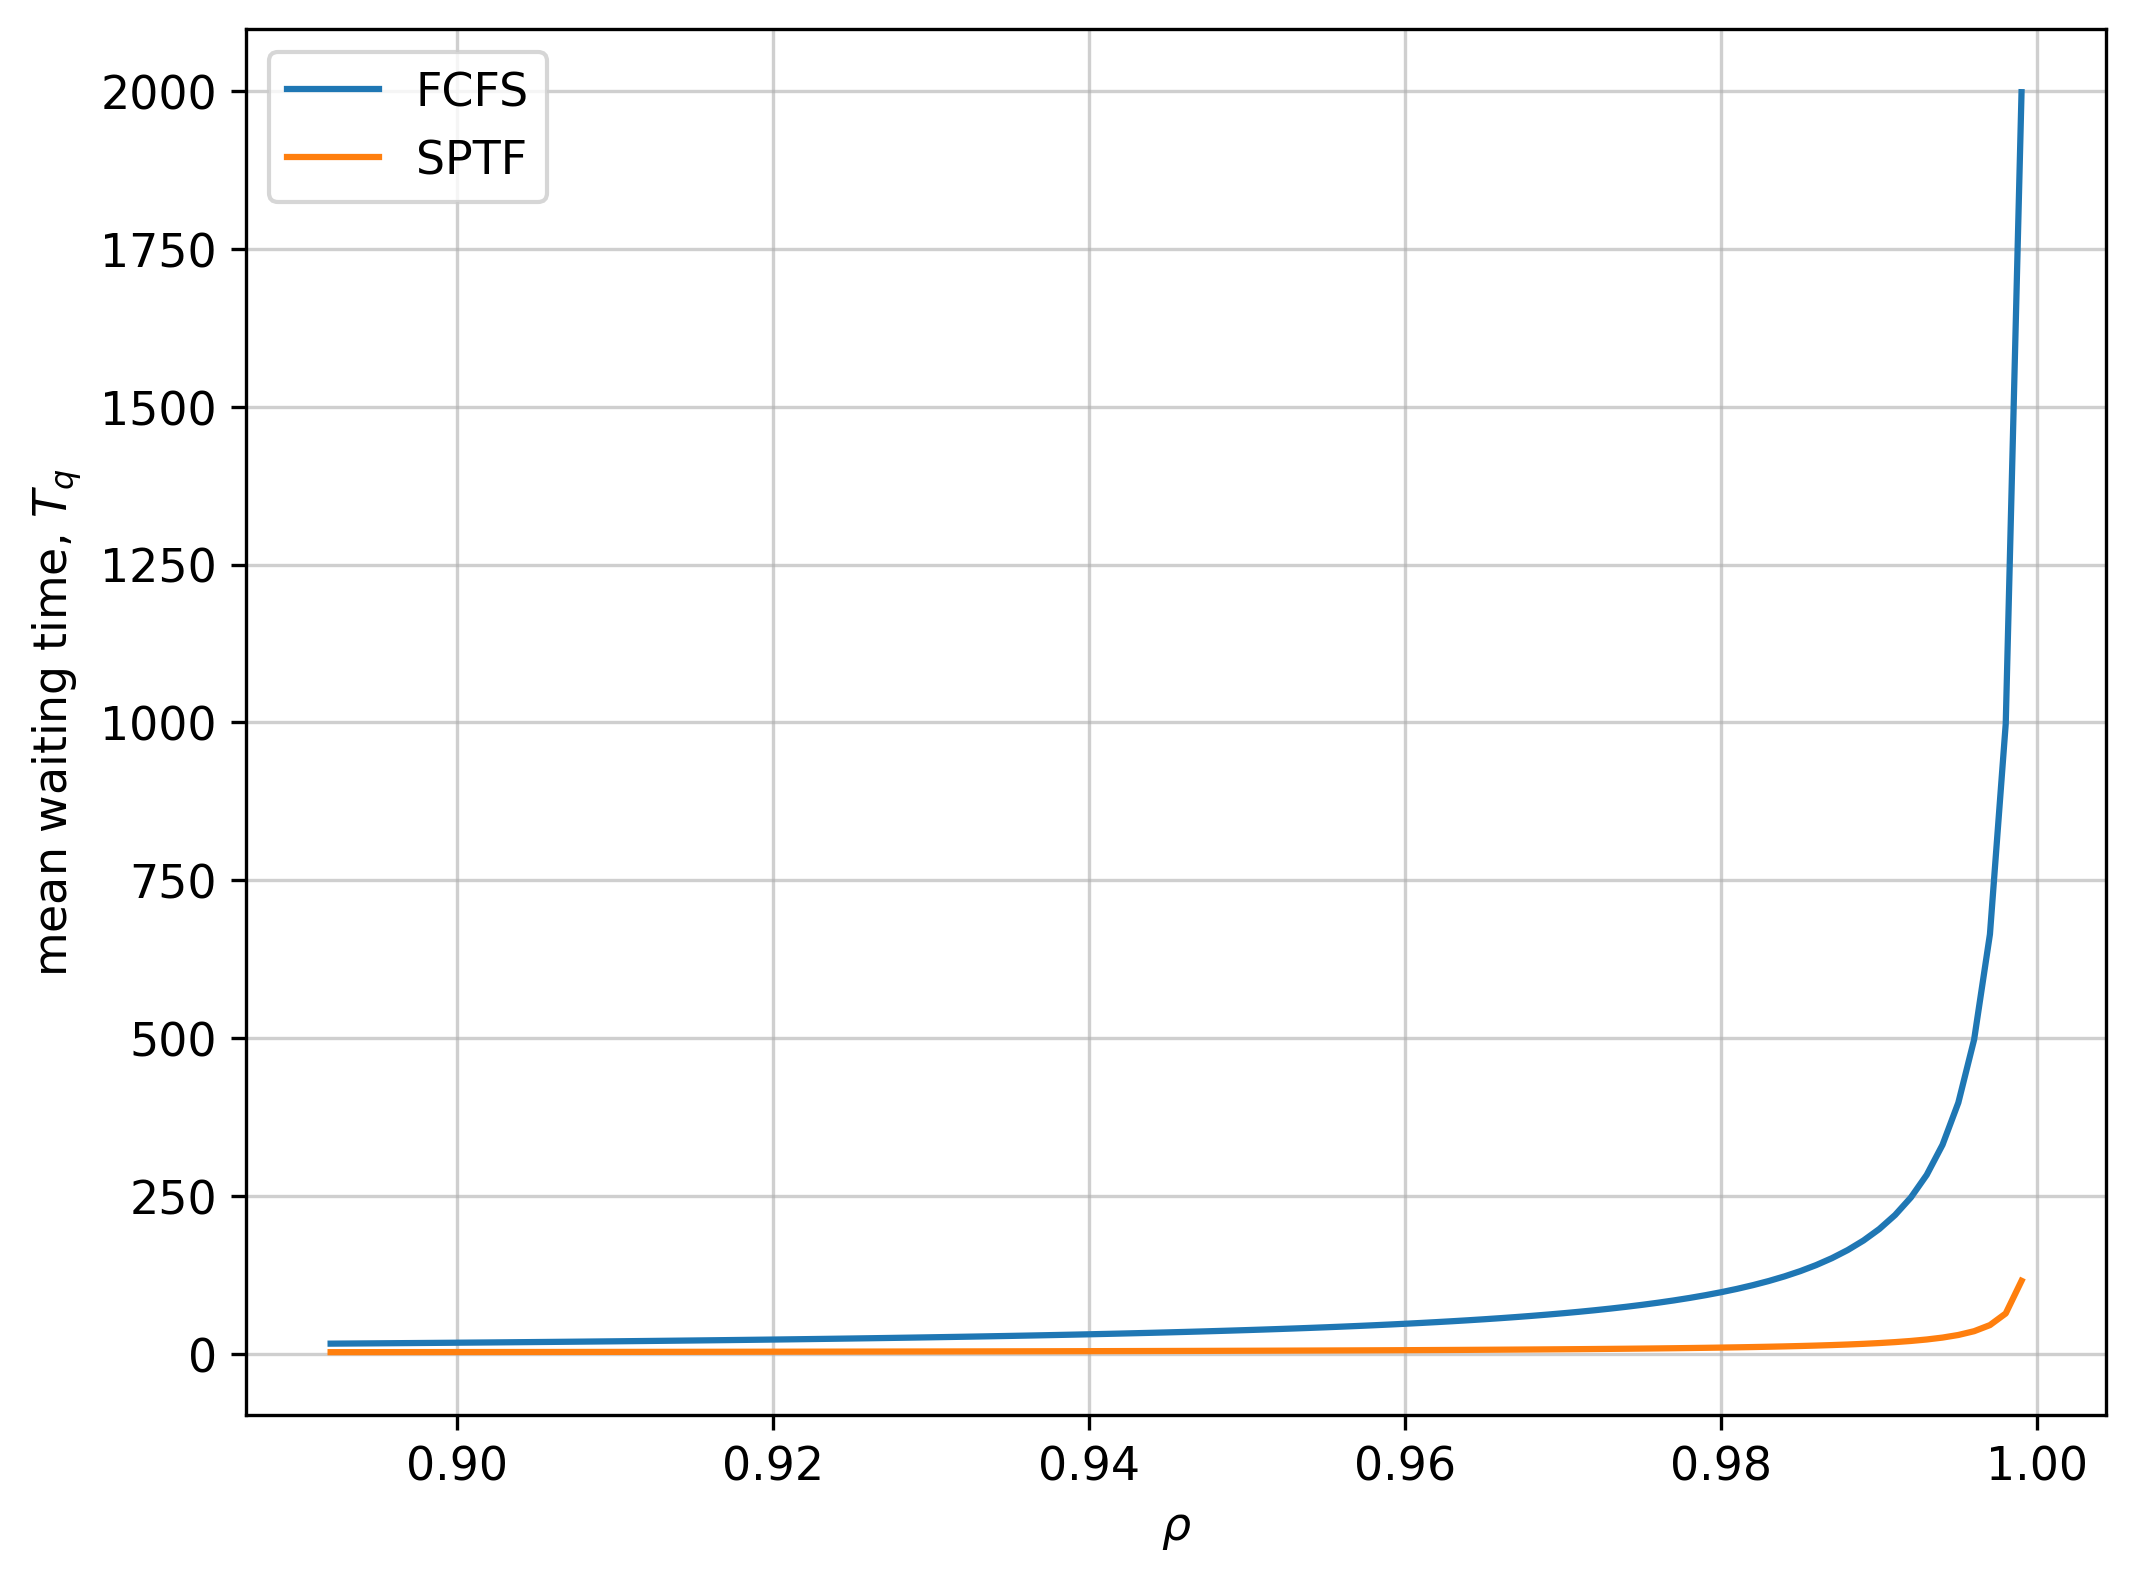

In [75]:
labels = ["FCFS", "SPTF"]
plot_comparison(waiting_times, ρ_values, labels, "MM1_FIFO_SPTF.pdf", start = 9 * (len(ρ_values)//10))

In [46]:
plot_comparison?